<a href="https://colab.research.google.com/github/titusjscott/multi-layer-perceptron/blob/main/MLP_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import keras
from keras.metrics import Precision, Recall
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/titusjscott/multi-layer-perceptron/main/breastcancerdata.csv")


In [3]:
print(df.shape)

(569, 33)


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df = df.iloc[:,:-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

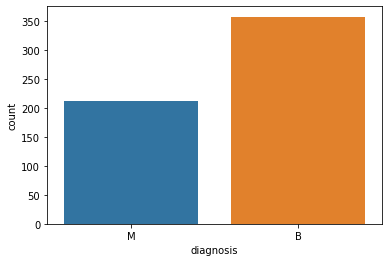

In [6]:
sns.countplot(df['diagnosis'], label = "Count")

In [7]:
train, test = train_test_split(df, test_size=0.35, random_state = 38)
print("Training Data :", train.shape)
print("Testing Data :", test.shape)

Training Data : (369, 32)
Testing Data : (200, 32)


In [14]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
385,90291,M,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,...,15.79,31.71,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
194,87556202,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,...,16.08,27.78,118.60,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701
88,861597,B,12.36,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,...,13.83,30.50,91.46,574.7,0.1304,0.2463,0.2434,0.1205,0.2972,0.09261
177,87281702,M,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,...,17.79,28.45,123.50,981.2,0.1415,0.4667,0.5862,0.2035,0.3054,0.09519


In [8]:
train_id = train['id']
test_id = test['id']

train_df = train.iloc[:,1:]
test_df = test.iloc[:,1:]

print("Training Data :", train_df.shape)
print("Testing Data :", test_df.shape)

Training Data : (369, 31)
Testing Data : (200, 31)


In [16]:
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
385,M,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,...,15.79,31.71,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
194,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,16.08,27.78,118.60,784.7,0.1316,0.4648,0.4589,0.1727,0.3000,0.08701
88,B,12.36,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,0.1930,...,13.83,30.50,91.46,574.7,0.1304,0.2463,0.2434,0.1205,0.2972,0.09261
177,M,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,...,17.79,28.45,123.50,981.2,0.1415,0.4667,0.5862,0.2035,0.3054,0.09519


In [9]:
train_df_x = train_df.iloc[:,1:]
train_df_x = MinMaxScaler().fit_transform(train_df_x)

test_df_x = test_df.iloc[:,1:]
test_df_x = MinMaxScaler().fit_transform(test_df_x)

print(train_df_x.shape)
print(test_df_x.shape)

(369, 30)
(200, 30)


In [10]:
train_df_y = train_df.iloc[:,:1]
train_df_y[train_df_y=='M'] = 0
train_df_y[train_df_y=='B'] = 1
train_df_y = train_df_y.astype('float32')


test_df_y = test_df.iloc[:,:1]
test_df_y[test_df_y=='M'] = 0
test_df_y[test_df_y=='B'] = 1
test_df_y = test_df_y.astype('float32')

print(train_df_y.shape)
print(test_df_y.shape)

(369, 1)
(200, 1)


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(30,), bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='relu', bias_initializer='random_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer='random_normal')
])

In [12]:
# compile the model with binary cross-entropy loss and Adam optimizer, and add precision, recall, and F1 score to the metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)


# train the model using the training set
history = model.fit(train_df_x, train_df_y, epochs=100, batch_size=32, validation_data=(test_df_x, test_df_y))

# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_df_x, test_df_y, verbose=0)

# Print the results
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)


Epoch 1/100
12/12 [==============================] - 2s 64ms/step - loss: 0.7170 - accuracy: 0.5962 - precision: 0.6254 - recall: 0.8922 - val_loss: 0.7147 - val_accuracy: 0.6150 - val_precision: 0.6212 - val_recall: 0.9840
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 0.7140 - accuracy: 0.6287 - precision: 0.6309 - recall: 0.9871 - val_loss: 0.7111 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 0.7110 - accuracy: 0.6314 - precision: 0.6304 - recall: 1.0000 - val_loss: 0.7081 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7074 - accuracy: 0.6287 - precision: 0.6287 - recall: 1.0000 - val_loss: 0.7050 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 1.0000
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7047 - accuracy: 0.6287 - prec

7/7 [==============================] - 0s 2ms/step
Confusion Matrix: 
[[ 72   3]
 [ 14 111]]


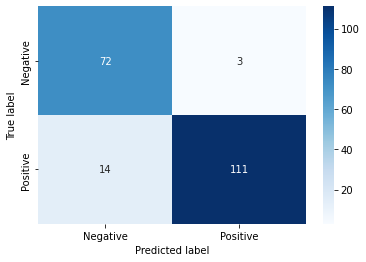

In [13]:
# predict classes for the test set
y_pred_prob = model.predict(test_df_x)
y_pred = (y_pred_prob > 0.5).astype(int)

# generate confusion matrix
cm = confusion_matrix(test_df_y, y_pred, labels=[0,1])

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted label')
plt.ylabel('True label')

# print confusion matrix
print('Confusion Matrix: ')
print(cm)
plt.show()
